**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2"
)
txt_fname = "results.enrich.fcc_active_vs_inactive.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_fit_summary = dat
print(dim(dat))
head(dat)

[1] 2084    6


Group,Feature,Stat,Pval,Score,Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,H2AFZ,35.764202,0.0000,1.6208491,0.000000000
Enhancer,H3K27ac,28.537164,0.0000,1.1127810,0.000000000
Enhancer,H3K27me3,-2.765306,0.0049,-1.0878141,0.005574017
Enhancer,H3K36me3,-14.052677,0.0000,-1.8813276,0.000000000
Enhancer,H3K4me1,22.520019,0.0000,0.6897697,0.000000000
Enhancer,H3K4me2,28.681501,0.0000,1.1229281,0.000000000


## Get top 20 TFs

In [7]:
rank(c(1, 10, 2, 5))

[1] 1 4 2 3

In [71]:
dat = dat_fit_summary
dat = dat %>%
    dplyr::group_by(Group) %>%
    dplyr::mutate(Rank = rank(-Score)) %>%
    dplyr::slice_max(Score, n = 30)

dat_fit_score_top = dat
print(dim(dat))
head(dat)

[1] 120   7


Group,Feature,Stat,Pval,Score,Padj,Rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,JUND,50.36474,0,2.647282,0,1
Enhancer,ATF3,46.77179,0,2.394693,0,2
Enhancer,ZNF175,45.87287,0,2.331499,0,3
Enhancer,FOSL1,45.78923,0,2.325619,0,4
Enhancer,ZNF281,45.66145,0,2.316636,0,5
Enhancer,ZNF589,43.41427,0,2.158656,0,6


In [77]:
dat = dat_fit_summary
dat = dat %>%
    dplyr::group_by(Group) %>%
    dplyr::mutate(Rank = rank(-Score)) %>%
    dplyr::ungroup() %>%
    dplyr::filter(Rank <= 30)
   

dat_fit_score_top = dat
print(dim(dat))
head(dat)

[1] 120   7


Group,Feature,Stat,Pval,Score,Padj,Rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,H2AFZ,35.76420,0,1.620849,0,26
Enhancer,ARID1B,35.64611,0,1.612547,0,27
Enhancer,ATF3,46.77179,0,2.394693,0,2
Enhancer,ATF4,40.16247,0,1.930051,0,10
Enhancer,ATF7,39.45368,0,1.880223,0,12
Enhancer,CREB3,38.54341,0,1.816230,0,16


In [78]:
dat = dat_fit_score_top
lst = split(dat, dat$Group)
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::arrange(Score)
    return(dat)
})
lst[[1]]

Group,Feature,Stat,Pval,Score,Padj,Rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,NFE2,35.20876,0,1.581801,0,30
Enhancer,ZNF644,35.28335,0,1.587045,0,29
Enhancer,SMARCA4,35.52088,0,1.603743,0,28
Enhancer,ARID1B,35.64611,0,1.612547,0,27
Enhancer,H2AFZ,35.76420,0,1.620849,0,26
Enhancer,ZNF395,36.09580,0,1.644161,0,25
Enhancer,MEF2D,36.23293,0,1.653801,0,24
Enhancer,ETV1,36.29908,0,1.658451,0,23
Enhancer,ZNF215,36.36036,0,1.662759,0,22


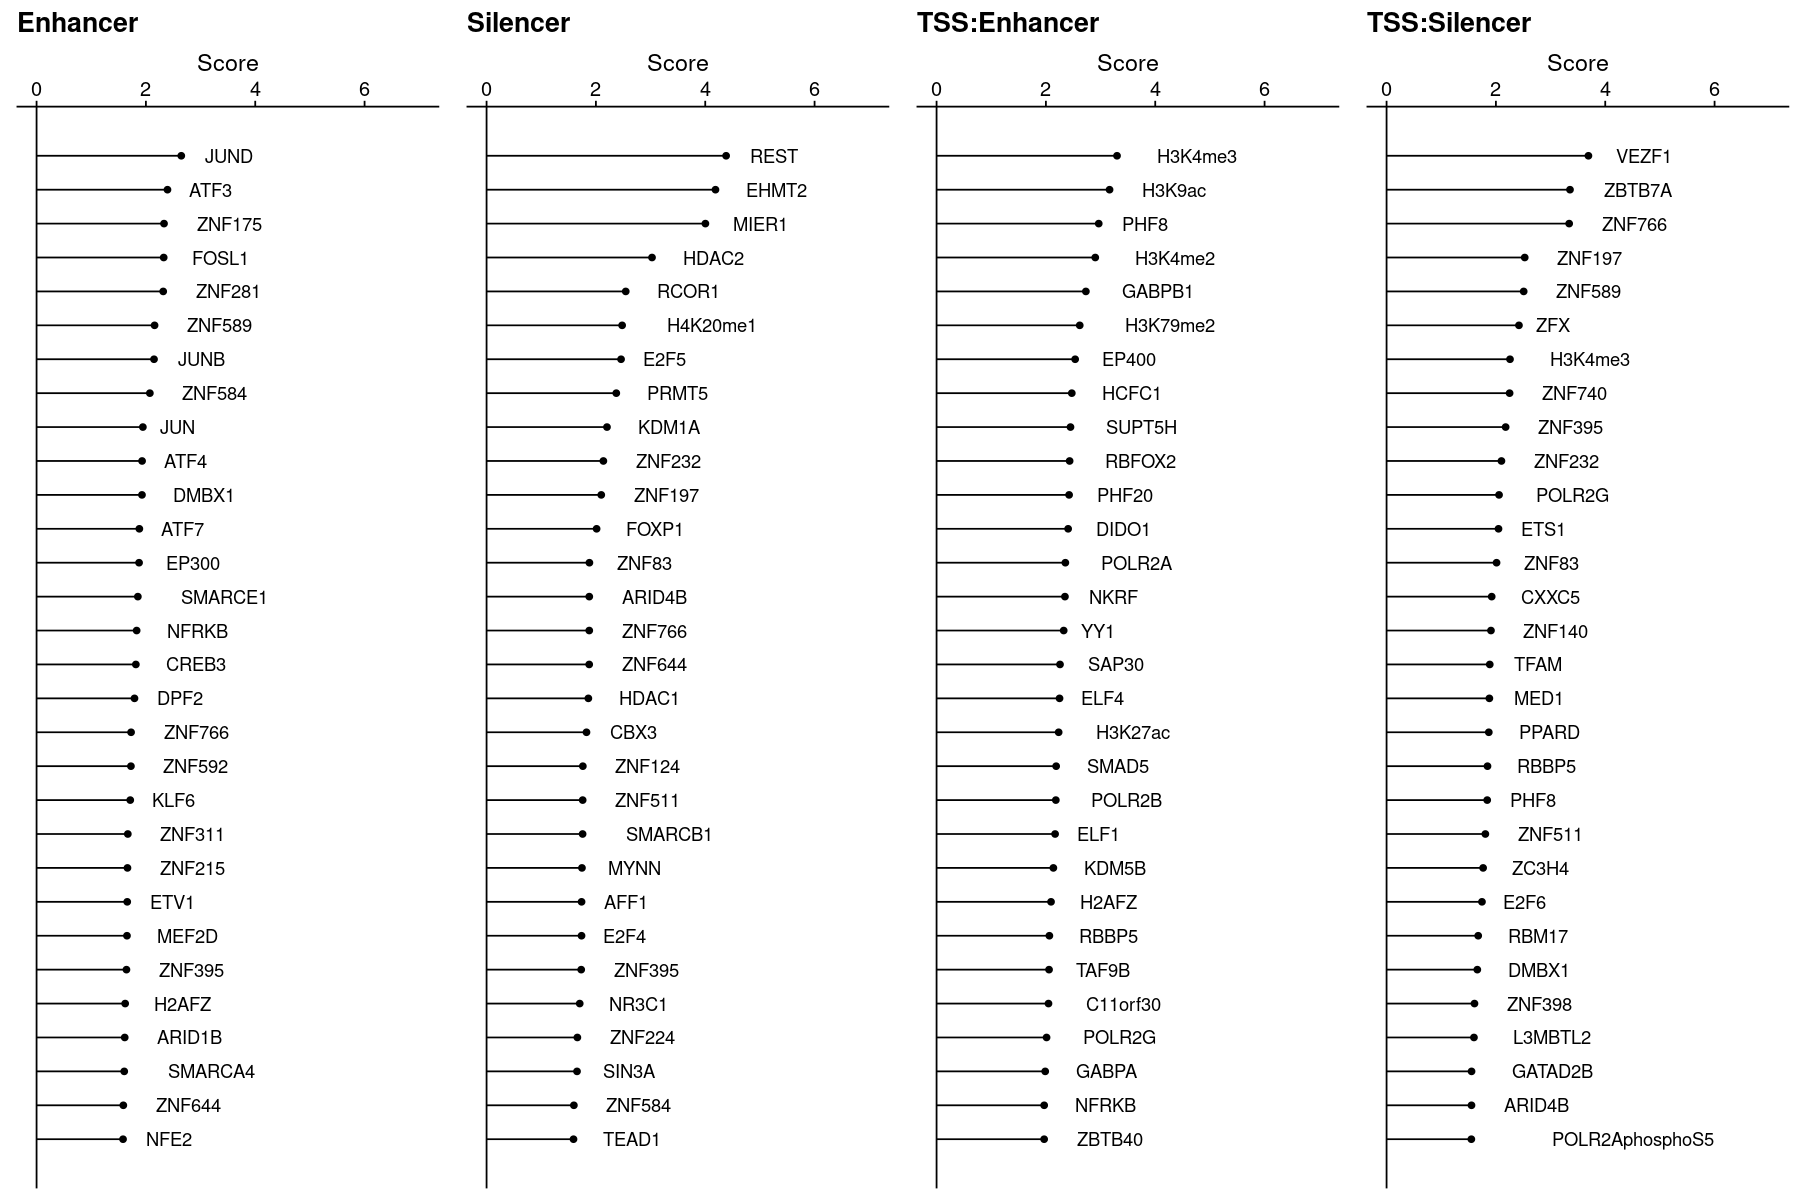

In [79]:
dat = dat_fit_score_top
lst = split(dat, dat$Group)
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Score, y=Rank, label=Feature)) + 
        geom_point() +
        geom_vline(xintercept = 0) +
        geom_linerange(aes(xmin=0, xmax=Score, y=Rank)) +
        geom_text(hjust=-0.5, vjust=0.5) +
        theme_cowplot() +
        scale_y_reverse() + 
        scale_x_continuous(position = 'top', limits = c(0, 7)) +
        theme(
            axis.title.y = element_blank(),
            axis.text.y  = element_blank(),
            axis.ticks.y = element_blank(),
            axis.line.y  = element_blank())
    return(gpt)
})

lst = lapply(names(lst), function(txt_group){
    gpt = lst[[txt_group]]
    gpt = gpt + labs(title = txt_group)
    return(gpt)
})

options(repr.plot.height=10, repr.plot.width = 15)
plot_grid(plotlist = lst, nrow=1)

In [80]:
dat = dat_fit_summary
dat = dat %>%
    dplyr::group_by(Group) %>%
    dplyr::mutate(Rank = rank(-abs(Score))) %>%
    dplyr::ungroup() %>%
    dplyr::filter(Rank <= 30)
   

dat_fit_score_top = dat
print(dim(dat))
head(dat)

[1] 120   7


Group,Feature,Stat,Pval,Score,Padj,Rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,H3K36me3,-14.05268,0,-1.881328,0,23
Enhancer,H3K79me2,-19.45931,0,-2.261419,0,9
Enhancer,H4K20me1,-26.33607,0,-2.744862,0,1
Enhancer,AGO1,-16.55391,0,-2.057167,0,15
Enhancer,ATF3,46.77179,0,2.394693,0,4
Enhancer,ATF4,40.16247,0,1.930051,0,20


In [83]:
dat = dat_fit_score_top
lst = split(dat, dat$Group)
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::arrange(Rank)
    return(dat)
})
lst[[1]]

Group,Feature,Stat,Pval,Score,Padj,Rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,H4K20me1,-26.33607,0,-2.744862,0,1
Enhancer,JUND,50.36474,0,2.647282,0,2
Enhancer,CTCF,-21.42163,0,-2.399372,0,3
Enhancer,ATF3,46.77179,0,2.394693,0,4
Enhancer,ZNF175,45.87287,0,2.331499,0,5
Enhancer,FOSL1,45.78923,0,2.325619,0,6
Enhancer,ZNF281,45.66145,0,2.316636,0,7
Enhancer,STAG1,-19.58064,0,-2.269949,0,8
Enhancer,H3K79me2,-19.45931,0,-2.261419,0,9


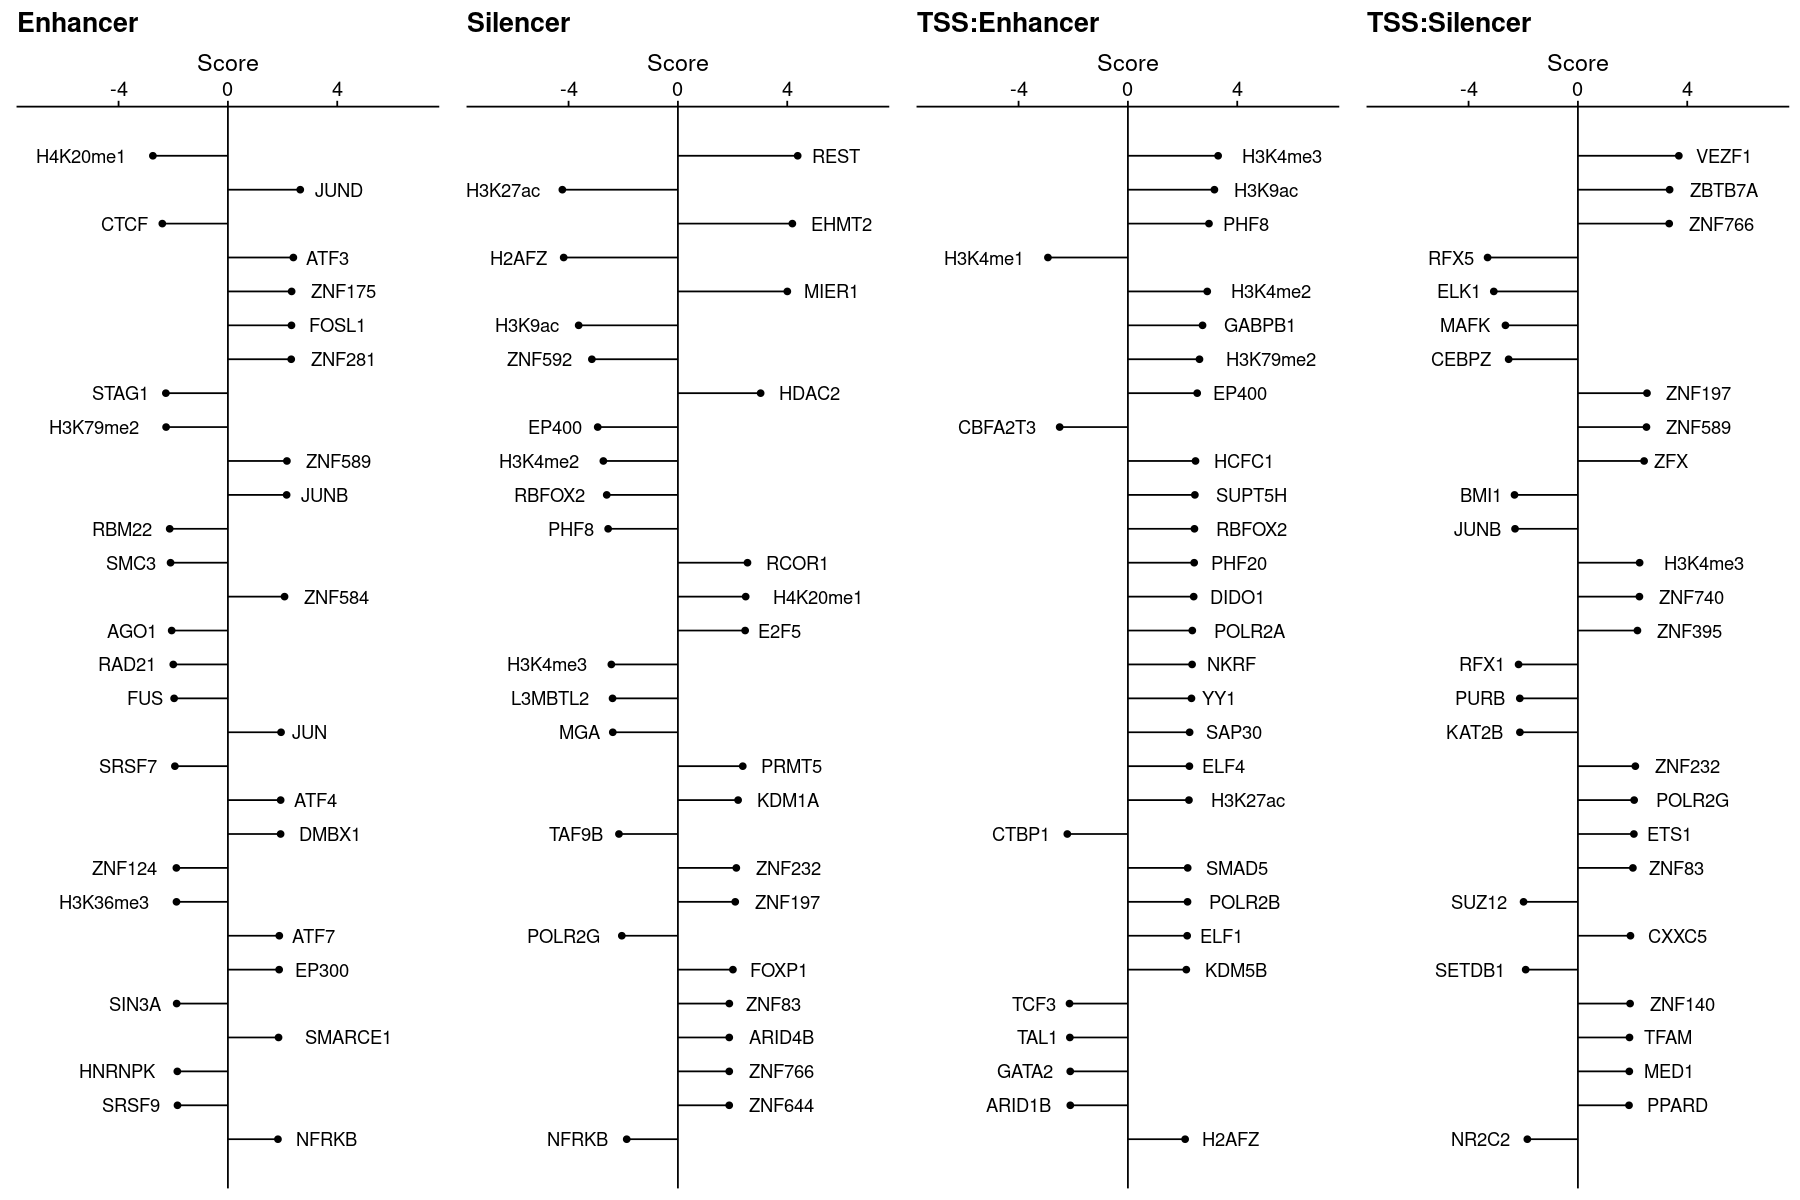

In [85]:
dat = dat_fit_score_top
lst = split(dat, dat$Group)
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Score, y=Rank, label=Feature)) + 
        geom_point() +
        geom_vline(xintercept = 0) +
        geom_linerange(aes(xmin=0, xmax=Score, y=Rank)) +
        geom_text(aes(hjust = ifelse(Score >= 0, -0.3, 1.3)), vjust=0.5) +
        theme_cowplot() +
        scale_y_reverse() + 
        scale_x_continuous(position = 'top', limits = c(-7, 7)) +
        theme(
            axis.title.y = element_blank(),
            axis.text.y  = element_blank(),
            axis.ticks.y = element_blank(),
            axis.line.y  = element_blank())
    return(gpt)
})

lst = lapply(names(lst), function(txt_group){
    gpt = lst[[txt_group]]
    gpt = gpt + labs(title = txt_group)
    return(gpt)
})

options(repr.plot.height=10, repr.plot.width = 15)
plot_grid(plotlist = lst, nrow=1)